
# IS–LM Model

## IS Curve

We define the IS curve by the following equation:

$$
i = \frac{C_{0} + I_{0} + G}{b}
    - \frac{\bigl[1 - c\,(1 - t)\bigr]\,Y}{b}
$$

Where:
- $C_{0}$ is **autonomous consumption**  
- $I_{0}$ captures the **marginal efficiency of capital**  
- $G$ is **government expenditure**  
- $c$ is the **marginal propensity to consume**  
- $t$ is the **tax rate**  
- $Y$ is the **level of output (income)**  
- $b$ is a **constant** reflecting the sensitivity of investment to the interest rate

As we’ve seen in our macroeconomics courses, the IS curve traces all combinations of interest rates and output levels that clear the goods market.

### Slope of the IS Curve

The slope is determined by the marginal propensity to consume $c$, the tax rate $t$, and the responsiveness of investment to changes in the interest rate.

### Shifts in the IS Curve

The entire curve shifts whenever:
- **Government spending** $G$ changes  
- **Autonomous consumption** $C_{0}$ changes  
- **Marginal efficiency of capital** $I_{0}$ changes  
 


## LM Curve

We define the LM curve by the following relation:

$$
i = \frac{k}{h}\,Y \;-\; \frac{1}{h}\,\frac{\bar{M}}{P}
$$

Where:  
- $k$ is the parameter measuring the sensitivity of money demand to income  
- $h$ is the parameter measuring the sensitivity of money demand to the interest rate  
- $Y$ is the level of output (income)  
- $\tfrac{\bar{M}}{P}$ is the real money supply, with $\bar{M}$ the nominal money supply and $P$ the (exogenous) price level  

The LM curve traces all combinations of interest rates and output levels for which money demand $M_{d}$ equals the real money supply $\tfrac{\bar{M}}{P}$.

---

##### Equilibrium

The key point in the IS–LM framework is where the IS and LM curves intersect. At this intersection, we find the unique interest rate and output level that clear both the goods market and the money market simultaneously.


## Equilibrium

To find the equilibrium point, we set the two curves equal:

$$
\text{IS} = \text{LM} \quad\Longrightarrow\quad i_{1} = i_{2}
$$

Substituting each side:

$$
\frac{C_{0} + I_{0} + G}{b}
\;-\;
\frac{\bigl[\,1 - c\,(1 - t)\bigr]\,Y}{b}
\;=\;
\frac{k}{h}\,Y
\;-\;
\frac{1}{h}\,\frac{\bar{M}}{P}
$$

Solving for the equilibrium output level $Y^*$ gives:

$$
Y^*
=
\frac{(C_{0} + I_{0} + G)\,h}{k\,b \;-\; \bigl(1 - c\,(1 - t)\bigr)\,h}
\;+\;
\frac{b\,\bar{M}}{P\,\bigl(k\,b \;-\; \bigl(1 - c\,(1 - t)\bigr)\,h\bigr)}
$$

Finally, plugging $Y^*$ back into either the IS or the LM equation yields the equilibrium interest rate:

$$
i^*
=
\frac{k}{h}\,Y^*
\;-\;
\frac{1}{h}\,\frac{\bar{M}}{P}
$$


## Money Market

We can derive the money market behind the LM curve by first noting that real money supply is fixed by the central bank:

$$
M_{d} = \frac{\bar{M}}{P}
$$

Here, $M_{d}$ is the real demand for money and $\tfrac{\bar{M}}{P}$ is the real money supply (with $\bar{M}$ set exogenously and $P$ the price level).

In the classical Keynesian specification, real money demand is given by:

$$
M_{d}
=
\frac{k}{\bigl(1 - c\,(1 - t)\bigr)\,h + b\,k}
\;\bigl(C_{0} + I_{0} + G\bigr)
\;-\;
m
\;\frac{1 - c\,(1 - t)}{\bigl(1 - c\,(1 - t)\bigr)\,h + b\,k}
$$

Where:
- $k$, $h$, $c$, $t$, $b$, $C_{0}$, $I_{0}$, and $G$ retain their previous meanings.  
- $m$ is a parameter capturing additional interest-sensitivity in money demand.

Equating demand and supply in this market gives:

$$
\frac{k}{\bigl(1 - c\,(1 - t)\bigr)\,h + b\,k}
\;(C_{0} + I_{0} + G)
\;-\;
m
\;\frac{1 - c\,(1 - t)}{\bigl(1 - c\,(1 - t)\bigr)\,h + b\,k}
\;=\;
\frac{\bar{M}}{P}
$$

##### Note

The equilibrium interest rate solving this equation is exactly the same $i^{*}$ we obtain from the IS–LM intersection — as we will show in the graphical analysis that follows.  


## Aggregate Demand

Keynes’s classical aggregate demand function is:

$$
Y = \bigl(I_{0} - b\,i\bigr) + G + \bigl(C_{0} + c\,(1 - t)\,Y\bigr)
$$

Where:
- $I_{0}$ is the marginal efficiency of capital  
- $b$ is the investment sensitivity parameter  
- $i$ is the interest rate  
- $G$ is government spending  
- $C_{0}$ is autonomous consumption  
- $c$ is the marginal propensity to consume  
- $t$ is the tax rate  
- $Y$ is output (income)  

## Aggregate Supply

Under the assumption of sticky prices, aggregate supply is fixed at the price level:

$$
AS = \bar{P}
$$

Here, $AS$ denotes aggregate supply and $\bar{P}$ is the (exogenous) price level.  


In [67]:
import numpy as np
import matplotlib.pyplot as plt

class ISLM:
    def __init__(self, Co, Io, G ,b ,c, t, k, h, M , P ):
        self.ConsumoAutonomo=Co #1
        self.EfectosEficiencia=Io #2
        self.GastoPublico=G #3
        self.parametro=b #4
        self.PropoencionConsumir=c #5
        self.TasaImpuestos=t #6
        self.SensibilidadDineroIng=k #7
        self.SensibilidadDineroi=h #8
        self.OfertaDinero=M #9
        self.precios=P #10

    def test(self):
        """
    Validate model parameters for tax rate and consumption propensity.

    This method checks that:
      - `TasaImpuestos` and `PropoencionConsumir` are within [0, 1].
    Returns
    -------
    str
        - Error message if a rate is outside [0,1] or any parameter is negative.
        - Confirmation message if all checks pass.
    """
        l1=[i for i in self.__dict__.values()]
        if 0 < self.TasaImpuestos > 1 or 0 < self.PropoencionConsumir > 1:
            return 'The parameters tax rate and propensity to consume must be in the interval [0,1]'
        for i in l1:
            if i<0:
                return 'Parameters cannot be negative.'
            else:
                pass
        return 'Parameters entered correctly'

    def CurvaIS(self , Y):
        """
    Return the IS‐curve interest rate for a given output level.
    
    See the introduction for the full equation.  
    Returns the computed rate, or an error message if division by zero occurs.
    """
        try:
            return ((self.ConsumoAutonomo+self.EfectosEficiencia+self.GastoPublico)/self.parametro) - (((1-self.PropoencionConsumir*(1-self.TasaImpuestos))*Y)/self.parametro)
        except ZeroDivisionError:
            return 'Cannot be divided by 0'
        
    def CurvaLM(self, Y):
        """
        Calculate the LM-curve interest rate for a given output level.
    
        Formula:
            i = (SensibilidadDineroIng / SensibilidadDineroi) * Y
                - (1 / SensibilidadDineroi) * (OfertaDinero / precios)
    
        Returns the computed rate, or an error message if division by zero occurs.
        """
        try:
            return (
                (self.SensibilidadDineroIng / self.SensibilidadDineroi) * Y
                - (1 / self.SensibilidadDineroi) * (self.OfertaDinero / self.precios))
        except ZeroDivisionError:
            return 'Cannot be divided by 0'

    def Equilibrio(self):
        """
        Compute the IS–LM equilibrium.

        Uses the equations defined in the introduction to calculate:
        - Equilibrium output (Y*) 
        - Equilibrium interest rate (i*)

        Returns
        -------
        tuple of floats
            (Y_star, i_star), both rounded to three decimals.
        """
        try:
            y_eqlb = (((self.ConsumoAutonomo+self.EfectosEficiencia+self.GastoPublico)*self.SensibilidadDineroi) / (self.SensibilidadDineroIng*self.parametro + (1-self.PropoencionConsumir *(1-self.TasaImpuestos))*self.SensibilidadDineroi)) + self.parametro*self.OfertaDinero/(self.precios*(self.SensibilidadDineroIng*self.parametro + (1-self.PropoencionConsumir *(1-self.TasaImpuestos))*self.SensibilidadDineroi))
            i_eqlb = ((self.SensibilidadDineroIng/self.SensibilidadDineroi)*y_eqlb) - ((1/self.SensibilidadDineroi)*(self.OfertaDinero/self.precios))
            return round(y_eqlb,3), round(i_eqlb,3)
        except ZeroDivisionError:
            return 'Cannot be divided by 0'

    def actualizar(self, parametro , c):
        """
        Update the specified attribute on the model instance.

        Returns:
            None if the attribute exists and is updated successfully.
            'Enter a valid parameter' if no matching attribute is found.
        """
        for i in self.__dict__:
            if i == parametro:
                self.__dict__[parametro]=c
                break
        else:
            return 'Enter a valid parameter'
        

    def MercadoDinero(self , m):
        """
        Compute the equilibrium real money demand for a given money supply parameter.

        Returns the real money demand implied by the IS–LM framework,
        using the model’s sensitivity parameters and fiscal components.
        """
        return (self.SensibilidadDineroIng / ((1 - self.PropoencionConsumir * (1 - self.TasaImpuestos)) * self.SensibilidadDineroi + self.parametro * self.SensibilidadDineroIng) * (self.ConsumoAutonomo + self.EfectosEficiencia + self.GastoPublico)) - (m * (1 - self.PropoencionConsumir * (1 - self.TasaImpuestos)) / ((1 - self.PropoencionConsumir * (1 - self.TasaImpuestos)) * self.SensibilidadDineroi + self.parametro * self.SensibilidadDineroIng))

    def CurvaDemanda(self, Y, eq=Equilibrio):
        """
        Calculate aggregate demand for a given output level.

        Uses the equilibrium interest rate from eq(self):
            AD = (I₀ - b·i_eq) + G + (C₀ + c·(1 - t)·Y)

        Parameters
        ----------
        Y : float
            Output (income) level for the consumption term.
        eq : callable, default Equilibrio
            Function returning a tuple (Y*, i*) of equilibrium output and interest rate.

        Returns
        -------
        float
            The aggregate demand corresponding to Y.
        """

        # Extract the equilibrium interest rate
        i_eq = eq(self)[1]
        return (
            (self.EfectosEficiencia - self.parametro * i_eq)
            + self.GastoPublico
            + (self.ConsumoAutonomo + Y * self.PropoencionConsumir * (1 - self.TasaImpuestos)))


    def graph(self,  IS=CurvaIS, LM=CurvaLM, Dinero=MercadoDinero , Demanda=CurvaDemanda ,eq=Equilibrio):
        """
        Plot the IS–LM model, money market, and aggregate relationships.

        Parameters
        ----------
        self : object
            Model instance containing parameters and methods:
            - CurvaIS
            - CurvaLM
            - MercadoDinero
            - CurvaDemanda
            - Equilibrio
        IS : callable, default CurvaIS
            Function to compute the IS-curve interest rate given output levels.
        LM : callable, default CurvaLM
            Function to compute the LM-curve interest rate given output levels.
        Dinero : callable, default MercadoDinero
            Function to compute money demand given output levels.
        Demanda : callable, default CurvaDemanda
            Function to compute aggregate demand given output levels.
        eq : callable, default Equilibrio
            Function returning a tuple (Y*, i*) of equilibrium output and interest rate.

        Returns
        -------
        None
            Displays a 2x2 grid of plots:
            - Money market (demand vs. supply)
            - IS–LM curves with equilibrium point
            - National economy: aggregate supply vs. demand
        """
        rango , ymax = 0 , 0

        while rango < eq(self)[0]:
            rango = rango +1

        while ymax < eq(self)[1]:
            ymax = ymax +1

        if eq(self)[1] < 1 and eq(self)[0]<5:
          rango = rango+1
          ymax = 0.5
          ymin = -0.2
        else:
          rango = rango + eq(self)[0]*1.1
          ymax = ymax +  eq(self)[1]*0.8
          ymin = 0


        ejex = np.linspace(0.01, rango , num=60)
        ejeyIS = IS(self,ejex)
        ejeyLM = LM(self,ejex)

        OfertaDinero = self.OfertaDinero / self.precios
        ejeyDinero = Dinero(self,ejex)

        ejeyDemanda = Demanda(self,ejex)

        fig, ((ax1, ax2), (_, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        ax2.plot(ejex, ejeyIS, linewidth=3, label='IS Curve', color='#FF0000')
        ax2.plot(ejex, ejeyLM, linewidth=3, label='LM Curve', color="#00008B")
        ax2.axvline(x=eq(self)[0], linewidth=2, linestyle='--', color='brown')
        ax2.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f')
        ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10 ,label='IS-LM Model Equilibrium')
        ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, 10), ha='center', color='black', fontweight="bold")
        ax2.set_ylim (ymin,top=ymax)
        ax2.set_xlabel('Production level', fontweight='bold')
        ax2.set_ylabel('Interest rate', fontweight='bold')
        ax2.set_title('IS-LM Model')
        ax2.legend()
        ax2.grid(True)

        ax1.plot(ejex, ejeyDinero, linewidth=3, label='Money Demand', color="#00008B")
        ax1.axvline(x=OfertaDinero, linewidth=2, label='Money Supply', color='#FF0000')
        ax1.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f')
        ax1.set_ylim (ymin,top=ymax)
        ax1.set_xlabel('Money Demand', fontweight='bold')
        ax1.set_ylabel('Interest rate', fontweight='bold')
        ax1.set_title('Money market', fontweight='bold')
        ax1.legend()
        ax1.grid(True)

        ax4.plot(ejex, ejex, linewidth=3, label='Market Supply', color="#FF0000")
        ax4.plot(ejex, ejeyDemanda, linewidth=3, label='Market Demand', color="#00008B")
        ax4.axvline(x=eq(self)[0], linewidth=2, label='Equilibrium of supply and demand', color='brown' , linestyle='--' )
        ax4.set_xlabel('Production level', fontweight='bold')
        ax4.set_ylabel('Price Level', fontweight='bold')
        ax4.set_title('National Economy')
        ax4.legend()
        ax4.grid(True)

        plt.tight_layout()
        plt.show()


    def Shock(self, IS=CurvaIS, LM=CurvaLM, Dinero=MercadoDinero , Demanda=CurvaDemanda ,eq=Equilibrio):
        rango , ymax  =  0 , 0
        while rango < eq(self)[0]:
            rango = rango +1

        while ymax < eq(self)[1]:
            ymax = ymax +1

        if eq(self)[1] < 1 and eq(self)[0]<5:
          rango = rango+1
          ymax = 0.5
          ymin = -0.2
        else:
          rango = rango + eq(self)[0]*1.1
          ymax = ymax +  eq(self)[1]*0.8
          ymin = 0

        ejex = np.linspace(0.01, rango, num=60)
        ejeyIS = IS(self,ejex)
        ejeyLM = LM(self,ejex)

        OfertaDinero = self.OfertaDinero / self.precios
        ejeyDinero = Dinero(self,ejex)

        ejeyDemanda = Demanda(self,ejex)

        try:
          choque= int(input(""""Select which shock to model:  
                            1) Fiscal policy shock
                            2) Monetary policy shock
                            3) Both shocks """))
        except:
          return "Enter a numeric value"

        while choque != 1 and choque!= 2 and choque != 3:
          choque= int(input("Enter a valid shock (1 or 2 or 3)"))

        fig, ((ax1, ax2), (_, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        ax2.plot(ejex, ejeyIS, linewidth=3, label='IS Curve', color='#00008B')
        ax2.plot(ejex, ejeyLM, linewidth=3, label='LM Curve', color='#FF0000')
        ax2.set_ylim(ymin, ymax)
        ax2.set_xlabel('Output Level', fontweight='bold')
        ax2.set_ylabel('Interest Rate', fontweight='bold')
        ax2.set_title('IS–LM Model', fontweight='bold')
        ax2.legend()
        ax2.grid(True)

        ax1.plot(ejex, ejeyDinero, linewidth=3, label='Money Demand', color="#00008B")
        ax1.axvline(x=OfertaDinero, linewidth=2, label='Money Supply', color='#FF0000')
        ax1.set_ylim(ymin, ymax)
        ax1.set_xlabel('Money Demand', fontweight='bold')
        ax1.set_ylabel('Interest Rate', fontweight='bold')
        ax1.set_title('Money Market', fontweight='bold')
        ax1.legend()
        ax1.grid(True)

        ax4.plot(ejex, ejex, linewidth=3, label='Market Supply', color="#FF0000")
        ax4.plot(ejex, ejeyDemanda, linewidth=3, label='Market Demand', color="#00008B")
        ax4.set_xlabel('Output Level', fontweight='bold')
        ax4.set_ylabel('Price Level', fontweight='bold')
        ax4.set_title('National Economy', fontweight='bold')
        ax4.legend()
        ax4.grid(True)


        if choque == 1:

          n= float(input("How much do you want to increase or decrease public spending in %?"))
          n=n/100
          print("Simulating a fiscal policy shock of:" , n*100 ,"%")

          self.actualizar('GastoPublico' , self.GastoPublico+(self.GastoPublico*n))
          ejeyIS = IS(self,ejex)
          ejeyDinero = Dinero(self,ejex)
          ejeyDemanda = Demanda(self,ejex)

          ax2.plot(ejex, ejeyIS, linewidth=2, label='IS Curve (shock)', color="#00008B", linestyle="-.")
          ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
          ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, 17), ha='center', color='black', fontweight="bold")
          ax2.axvline(x=eq(self)[0],linewidth=2,label='New IS–LM Equilibrium',linestyle='--',color='brown')
          ax2.axhline(y=eq(self)[1],linewidth=2,linestyle='--',color='#7f7f7f')
          ax2.legend()

          ax1.plot(ejex, ejeyDinero, linewidth=2, label='New Money Demand Curve (shock)', color='#00008B', linestyle="-.")
          ax1.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f', label='Money Supply–Demand Equilibrium')
          ax1.legend()

          ax4.plot(ejex, ejeyDemanda, linewidth=2, label='Aggregate Demand Curve (shock)', color='#00008B', linestyle="-.")
          ax4.axvline(x=eq(self)[0], linewidth=2, label='New Supply–Demand Equilibrium', color='brown', linestyle='--')
          ax4.legend()
          
          plt.tight_layout()
          plt.show()
          
        elif choque ==2:

          n= float(input("How much do you want to increase or decrease the money supply in %?"))
          n=n/100
          print("Simulating a monetary policy shock of:" , n*100 ,"%")

          self.actualizar('OfertaDinero', self.OfertaDinero + (self.OfertaDinero * n))
          ejeyLM = LM(self, ejex)
          ejeyDemanda = Demanda(self, ejex)
          OfertaDinero = self.OfertaDinero / self.precios

          ax2.plot(ejex, ejeyLM, linewidth=2, label='LM Curve (shock)', color="#FF0000", linestyle="-.")
          ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
          ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, -17), ha='center', color='black', fontweight="bold")
          ax2.axvline(x=eq(self)[0],linewidth=2,label='New IS–LM Equilibrium',linestyle='--',color='brown')
          ax2.axhline(y=eq(self)[1],linewidth=2,linestyle='--',color='#7f7f7f')
          ax2.legend()

          ax1.axvline(x=OfertaDinero, linewidth=2, color='#FF0000', linestyle="-.", label='Money Supply (shock)')
          ax1.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f', label='New Money Supply–Demand Equilibrium')
          ax1.legend()

          ax4.plot(ejex, ejeyDemanda, linewidth=2, color='#00008B', linestyle="-.", label='Aggregate Demand Curve (shock)')
          ax4.axvline(x=eq(self)[0], linewidth=2, label='New Supply–Demand Equilibrium', color='brown', linestyle='--')
          ax4.legend()

          plt.tight_layout()
          plt.show()


        elif choque == 3:
            n1= float(input('How much do you want to increase or decrease the money supply in %?'))
            n2= float(input('How much do you want to increase or decrease public spending in %?'))
            n1 ,n2 = n1/100 , n2/100

            print("Simulating a combined monetary and fiscal policy shock of:" , n1*100 ,"%" , "Money Suply and" , n2*100 ,"%", "Public spending")

            self.actualizar('OfertaDinero', self.OfertaDinero + (self.OfertaDinero * n1))
            self.actualizar('GastoPublico', self.GastoPublico + (self.GastoPublico * n2))

            ejeyLM = LM(self, ejex)
            ejeyDemanda = Demanda(self, ejex)
            OfertaDinero = self.OfertaDinero / self.precios

            ax2.plot(ejex, ejeyLM, linewidth=2, color="#FF0000", linestyle="-.", label='LM Curve (shock)')
            ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
            ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]),textcoords="offset points", xytext=(0, -10), ha='center',
                         color='black', fontweight="bold")
            ax2.axhline(y=eq(self)[1],linewidth=2,linestyle='--',color='#7f7f7f')
            ax2.legend()

            ax1.axvline(x=OfertaDinero, linewidth=2, color='#FF0000',linestyle="-.", label='Money Supply (shock)')
            ax1.legend()

            ax4.plot(ejex, ejeyDemanda, linewidth=2, color='#00008B',linestyle="-.", label='Aggregate Demand Curve (shock)')
            ax4.axvline(x=eq(self)[0], linewidth=2, label='New Supply–Demand Equilibrium', color='brown', linestyle='--')
            ax4.legend()

            ejeyIS = IS(self, ejex)
            ejeyDinero = Dinero(self, ejex)
            ejeyDemanda = Demanda(self, ejex)

            ax2.plot(ejex, ejeyIS, linewidth=2, color="#00008B", linestyle="-.",label='IS Curve (shock)')
            ax2.axvline(x=eq(self)[0],linewidth=2,label='New IS–LM Equilibrium',linestyle='--',color='brown')
            ax2.legend()

            ax1.plot(ejex, ejeyDinero, linewidth=2, color='#00008B', linestyle="-.",label='Money Demand Curve (shock)')
            ax1.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f', label='New Money Supply–Demand Equilibrium')
            ax1.legend()

            plt.tight_layout()
            plt.show()




## Create an IS-LM model that describes some economy

In [68]:
# Parameters for the IS-LM model
C0    = 1     # autonomous consumption
eff   = 1     # efficiency effects
G     = 1     # government spending
param = 6     # model-specific parameter
mpc   = 0.3   # marginal propensity to consume
tax   = 0.8   # tax rate
y_sens = 1    # income sensitivity of money demand
r_sens = 8    # interest-rate sensitivity of money demand
M     = 4     # money supply
P     = 3     # price level

# Instantiate and verify the IS-LM model
example = ISLM(C0, eff, G, param, mpc, tax, y_sens, r_sens, M, P)
example.test()

'Parameters entered correctly'

## Graph the base escenario of the Economy 

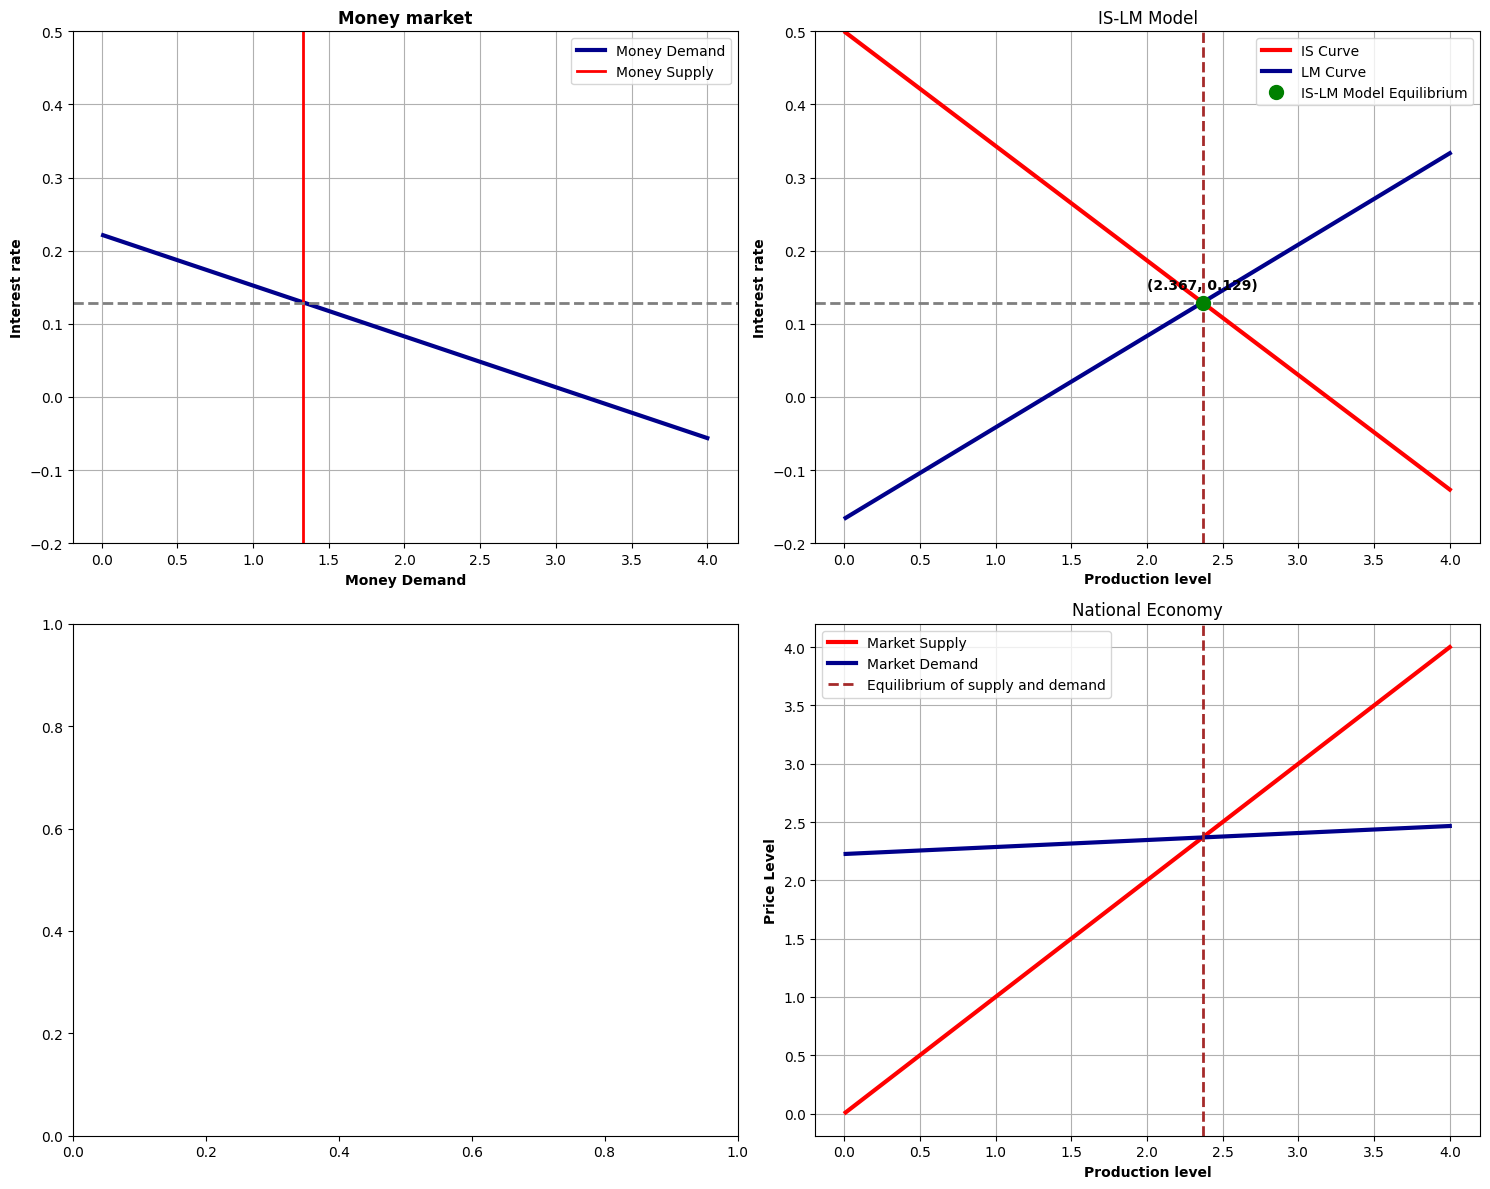

In [46]:
example.graph()

## Simulate a monetary policy shock on the economy

Simulating a monetary policy shock of: 20.0 %


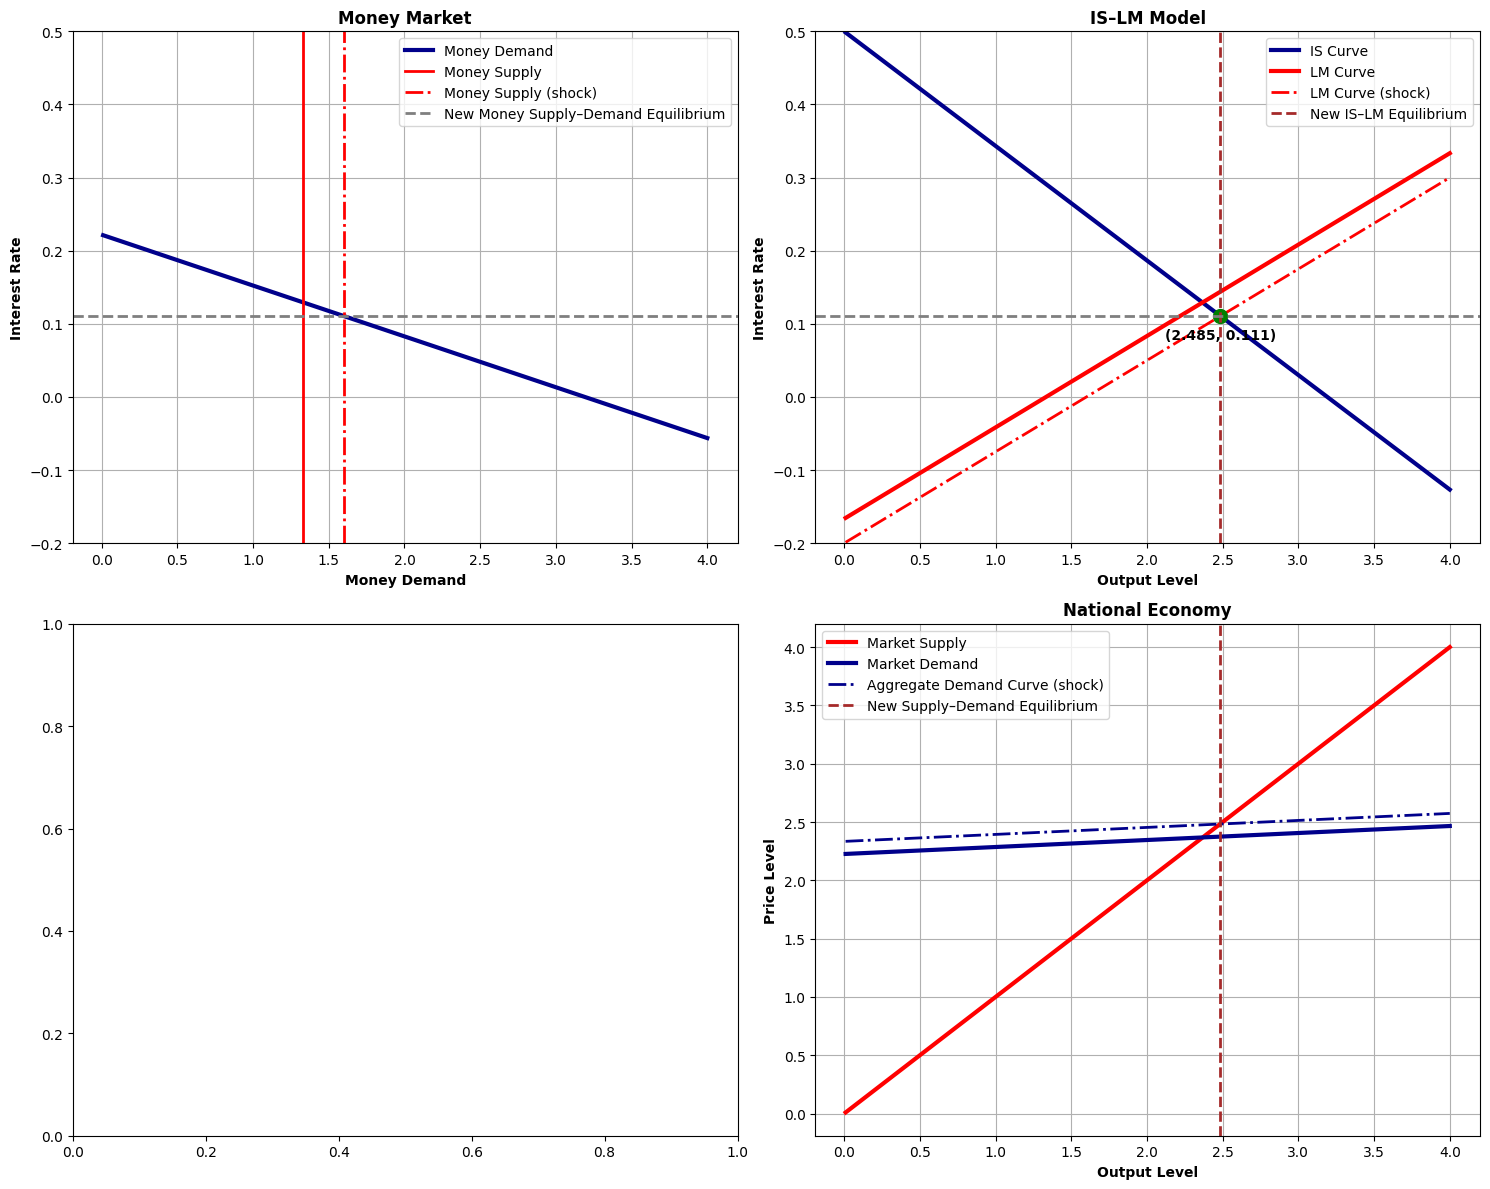

In [47]:
example.Shock()


### Money Market
- Real money supply $\frac{\bar M}{P}$ increases by 20%, shifting the supply curve right.
- Equilibrium interest rate falls from roughly $i\approx0.22$ to $i\approx0.11$.

### IS–LM Model
- The LM curve shifts down-right in response to the higher money supply.
- Equilibrium moves from $(Y\approx2.3,\;i\approx0.12)$ to $(Y^{*}\approx2.49,\;i^{*}\approx0.11)$.

### National Economy (AS–AD)
- Aggregate demand shifts right, raising the equilibrium output and price level.
- The new intersection reflects higher real GDP and a modest increase in prices.

**Interpretation:**  
A 20% expansion in real money supply lowers the interest rate, stimulates investment and consumption, and increases the equilibrium level of output in the IS–LM framework.  

## Simulate a fiscal policy shock on the economy

Simulating a fiscal policy shock of: 15.0 %


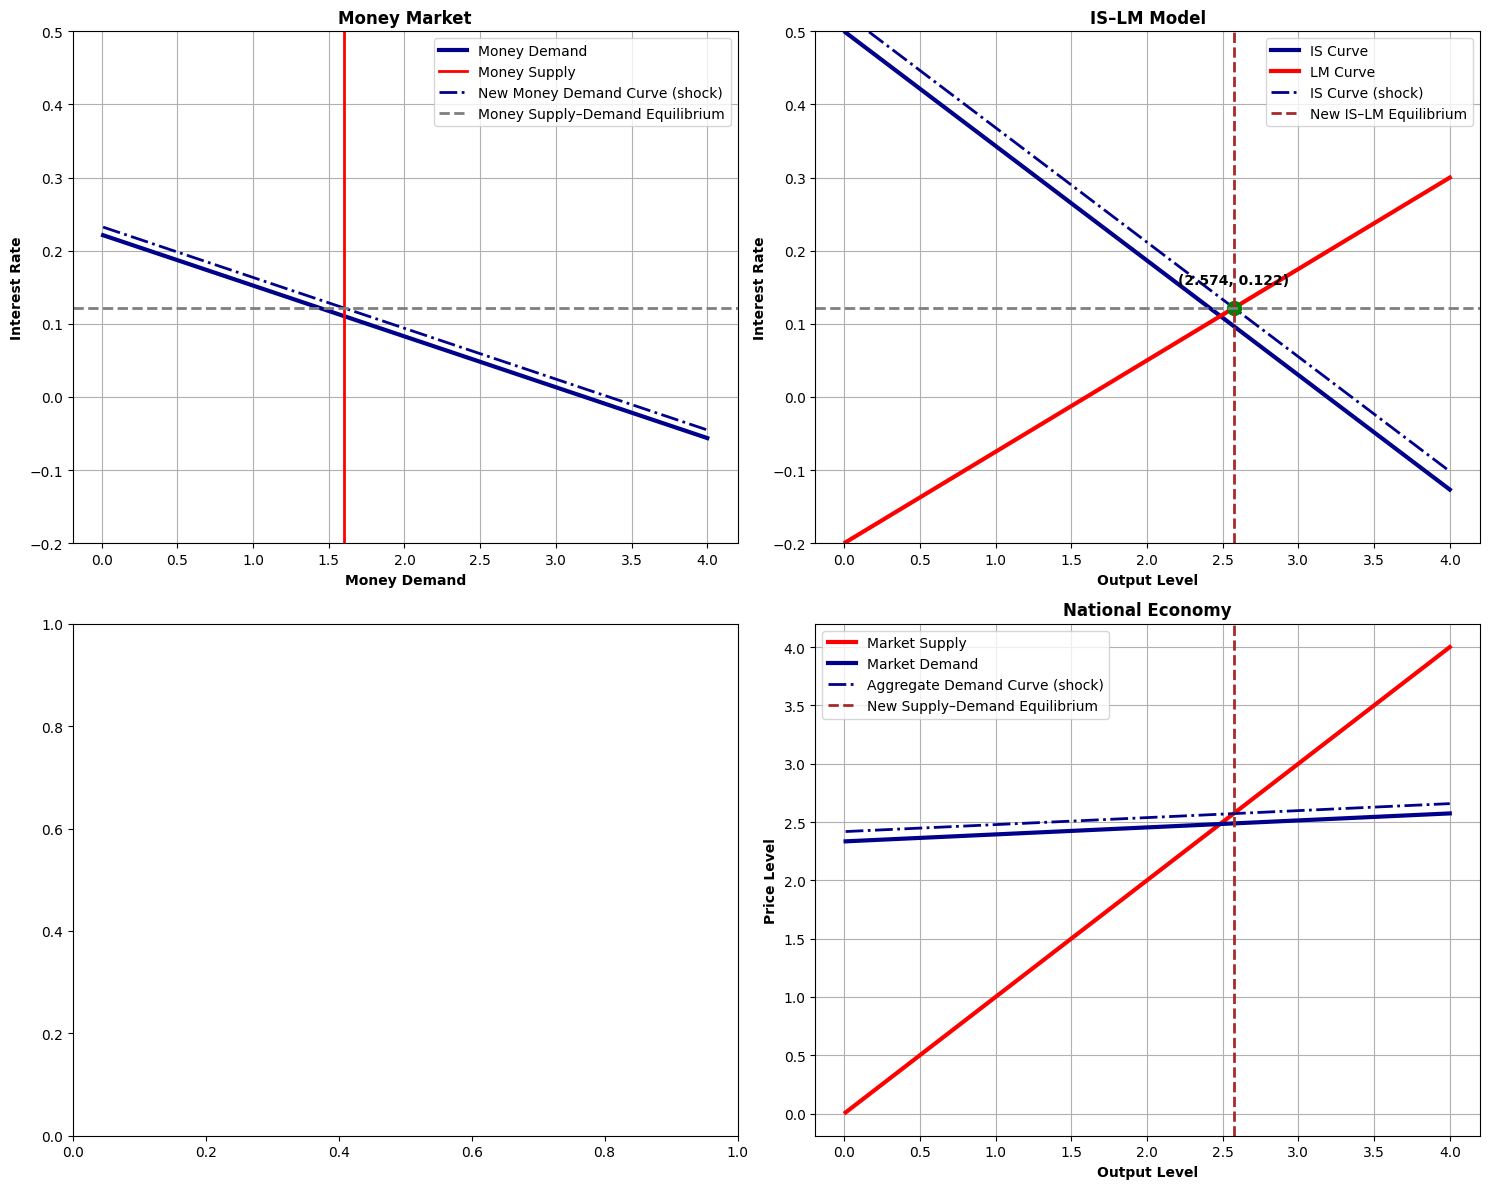

In [48]:
example.Shock()


### Money Market
- No change in real money supply $\frac{\bar M}{P}$.  
- Equilibrium interest rate remains $i^* = 0.12$.

### IS–LM Model
- The IS curve shifts right due to a 15 % increase in $G$.  
- Equilibrium moves from $(Y^*, i^*) = (2.37,\,0.12)$ to approximately

$
(Y^*, i^*) \approx (2.57,\,0.122).
$

- Outcome: higher output and a slight rise in the interest rate (partial crowding-out).

### National Economy (AS–AD)
- Aggregate demand shifts right.  
- Real output increases and, under sticky prices, there is a slight uptick in the price level.

**Interpretation:**  
A 15 % boost in government spending shifts goods demand to the right, raising the equilibrium output and exerting upward pressure on the interest rate—demonstrating the classic expansionary effect with partial crowding-out of private investment.  



## Simulate a combined effect of fiscal and monetary policy on the economy 

Simulating a combined monetary and fiscal policy shock of: 20.0 % Money Suply and 15.0 % Public spending


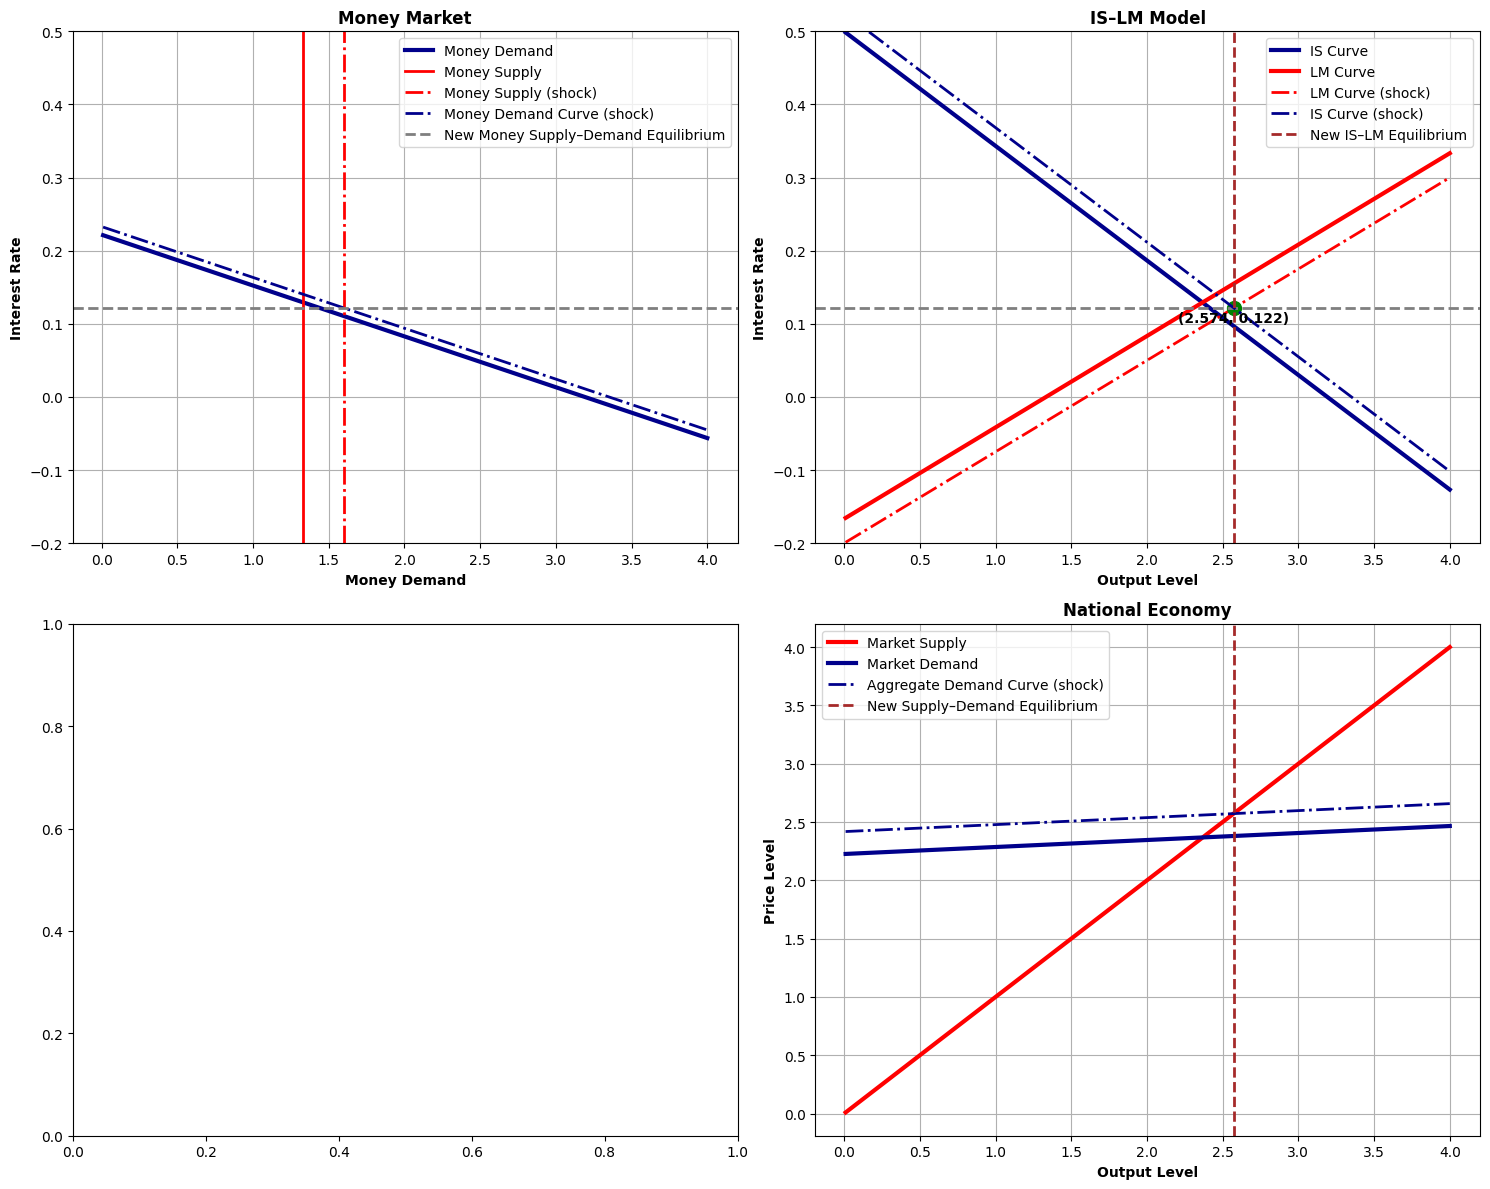

In [69]:
example.Shock()



### Money Market
- Real money supply $\frac{\bar M}{P}$ increases by 20 %, shifting the supply curve right.
- Equilibrium interest rate falls from $i^*=0.12$ to about $i^*\approx0.11$.

### IS–LM Model
- The IS curve shifts right (15 % ↑ in $G$) and the LM curve shifts down–right (20 % ↑ in $\bar M/P$).
- Equilibrium moves from
  $$
    (Y^*,\,i^*) = (2.37,\,0.12)
  $$
  to roughly
  $$
    (Y^*,\,i^*) \approx (2.70,\,0.115).
  $$
- Net effect: a larger boost to output and a slight reduction in the interest rate (monetary expansion outweighs fiscal crowding-out).

### National Economy (AS–AD)
- Aggregate demand shifts right on account of both higher $G$ and lower $i$.
- Equilibrium output rises to $Y^*\approx2.70$, and under sticky prices the price level ticks up only modestly.

**Interpretation:**  
Combining a 20 % monetary expansion with a 15 % increase in government spending yields a strong expansion in real GDP and, because the interest-rate-lowering effect of money dominates the upward pressure from fiscal policy, a small net decline in the equilibrium rate.  
